In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Downloads/bounce-rate.csv")
df.head()

,Client ID,Sessions,Avg. Session Duration,Bounce Rate
0,5.778476e+08,367,00:01:35,87.19%
1,1.583822e+09,260,00:01:04,29.62%
2,1.030699e+09,237,00:00:02,99.16%
3,1.025030e+09,226,00:02:22,25.66%
4,1.469968e+09,216,00:01:23,46.76%


In [4]:
# Remove the '%' sign from Bounce Rate and convert to float
df['Bounce Rate'] = df['Bounce Rate'].str.replace('%', '').astype(float)

# Convert Avg. Session Duration (HH:MM:SS) to seconds
def time_to_seconds(time_str):
    try:
        # Handle cases where time is negative or malformed
        if time_str.startswith('<'):
            return 0  # Treat '<00:00:01' as 0 seconds
        h, m, s = map(int, time_str.split(':'))
        return h * 3600 + m * 60 + s
    except:
        return 0  # Return 0 for any invalid formats

df['Session Duration (Seconds)'] = df['Avg. Session Duration'].apply(time_to_seconds)

# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Display the cleaned dataset
print("\nCleaned dataset (first 5 rows):")
df.head()

Missing values in the dataset:
Client ID                     0
Sessions                      0
Avg. Session Duration         0
Bounce Rate                   0
Session Duration (Seconds)    0
dtype: int64

Cleaned dataset (first 5 rows):


,Client ID,Sessions,Avg. Session Duration,Bounce Rate,Session Duration (Seconds)
0,5.778476e+08,367,00:01:35,87.19,95
1,1.583822e+09,260,00:01:04,29.62,64
2,1.030699e+09,237,00:00:02,99.16,2
3,1.025030e+09,226,00:02:22,25.66,142
4,1.469968e+09,216,00:01:23,46.76,83


# 1.Calculate the overall bounce rate

In [6]:
# Calculate the weighted average bounce rate
total_sessions = df['Sessions'].sum()
weighted_bounce_rate = (df['Bounce Rate'] * df['Sessions']).sum() / total_sessions

(f"Overall Bounce Rate: {weighted_bounce_rate:.2f}%")

'Overall Bounce Rate: 65.37%'

# 2. Analyze the Relationship Between Bounce Rate and Session Duration

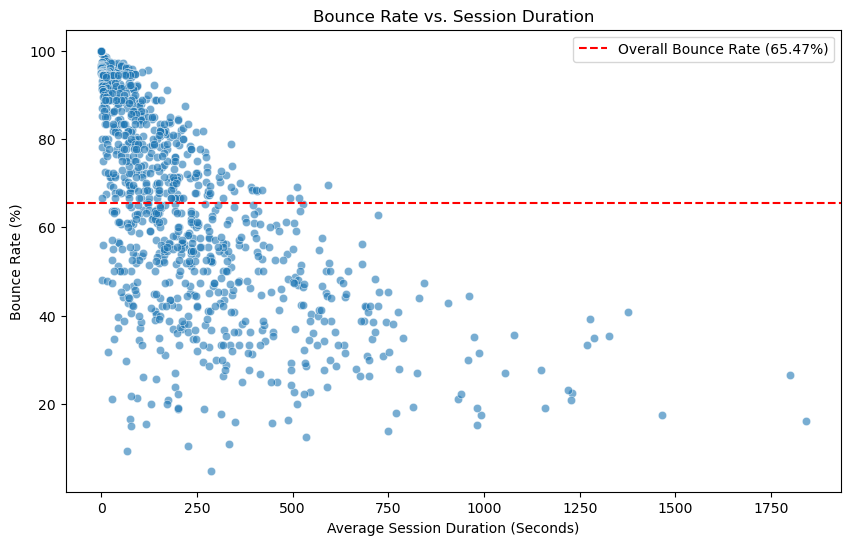

In [24]:
# Calculate correlation between Bounce Rate and Session Duration
correlation = df['Bounce Rate'].corr(df['Session Duration (Seconds)'])
(f"Correlation between Bounce Rate and Session Duration: {correlation:.2f}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Session Duration (Seconds)', y='Bounce Rate', data=df, alpha=0.6)
plt.title('Bounce Rate vs. Session Duration')
plt.xlabel('Average Session Duration (Seconds)')
plt.ylabel('Bounce Rate (%)')
plt.axhline(y=65.47, color='red', linestyle='--', label='Overall Bounce Rate (65.47%)')
plt.legend()
plt.savefig("Downloads/rate.png")
plt.show()


# 3. Segment Users by Bounce Rate Behaviors

In [1]:
# Define bounce rate segments
df['Bounce Segment'] = pd.cut(df['Bounce Rate'], 
                             bins=[0, 40, 70, 100], 
                             labels=['Low (<40%)', 'Moderate (40-70%)', 'High (>70%)'], 
                             include_lowest=True)

# Count the number of clients in each segment
segment_counts = df['Bounce Segment'].value_counts()
print("\nNumber of clients in each bounce rate segment:")
print(segment_counts)

# Calculate average session duration for each segment
segment_duration = df.groupby('Bounce Segment')['Session Duration (Seconds)'].mean()
print("\nAverage session duration by segment (in seconds):")
print(segment_duration)

# Create a pie chart for segment distribution
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Clients by Bounce Rate Segment')
plt.savefig("boucnce.png")
plt.show()



NameError: name 'pd' is not defined